In [1]:


import torch
import numpy as np
%load_ext autoreload
%autoreload 2
import pinot
import math
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Using backend: pytorch


In [2]:
# define the target
f = lambda x: torch.sin(x)

x_tr = torch.tensor(np.concatenate(
    [
        np.linspace(-3 * math.pi, -math.pi, 50),
        np.linspace(math.pi, 3 * math.pi, 50)
    ]),
    dtype=torch.float32)[:, None]

x_te = torch.tensor(np.concatenate(
    [
        np.linspace(-7 * math.pi, -3 * math.pi, 100),
        np.linspace(-math.pi, math.pi, 50),
        np.linspace(3 * math.pi, 7 * math.pi, 100)
    ]),
    dtype=torch.float32)[:, None]

x = torch.tensor(np.linspace(-7 * math.pi, 7 * math.pi, 375),
                 dtype=torch.float32)[:, None]


y_tr = f(x_tr)
y_te = f(x_te)
y = f(x)

In [3]:
dir(pinot.inference.gp.gpr)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'base_gpr',
 'exact_gpr',
 'pinot',
 'variational_gpr']

In [4]:
net = torch.nn.Sequential(
        torch.nn.Linear(1, 50),
        torch.nn.Tanh(),
        torch.nn.Linear(50, 1))

base_kernel=pinot.inference.gp.kernels.rbf.RBF()

kernel = pinot.inference.gp.kernels.deep_kernel.DeepKernel(
    net,
    base_kernel=base_kernel)

gpr = pinot.inference.gp.gpr.variational_gpr.VGPR(net, kernel, n_tr=x_tr.shape[0])

In [5]:
opt = torch.optim.Adam(gpr.parameters(), 1e-2)
for _ in range(5000):
    opt.zero_grad()
    loss = gpr.loss(x_tr, y_tr).sum()
    loss.backward()
    print(loss)
    opt.step()

/Users/wangy1/Documents/GitHub/pinot/pinot/inference/gp/gpr/variational_gpr.py:47: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  torch.range(0, self.sigma_diag.shape[0]-1)[:, None],
/Users/wangy1/Documents/GitHub/pinot/pinot/inference/gp/gpr/variational_gpr.py:48: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  torch.range(0, self.sigma_diag.shape[0]-1)[None, :]),


tensor(1146121.5000, grad_fn=<SumBackward0>)
tensor(141814.7031, grad_fn=<SumBackward0>)
tensor(76272.2188, grad_fn=<SumBackward0>)
tensor(54926.6523, grad_fn=<SumBackward0>)
tensor(44869.1680, grad_fn=<SumBackward0>)
tensor(39133.5156, grad_fn=<SumBackward0>)
tensor(35425.8398, grad_fn=<SumBackward0>)
tensor(32812.3125, grad_fn=<SumBackward0>)
tensor(30863.6152, grad_fn=<SumBackward0>)
tensor(29336.0996, grad_fn=<SumBackward0>)
tensor(28124.9473, grad_fn=<SumBackward0>)
tensor(27130.8516, grad_fn=<SumBackward0>)
tensor(26282.3105, grad_fn=<SumBackward0>)
tensor(25529.6641, grad_fn=<SumBackward0>)
tensor(24839.5000, grad_fn=<SumBackward0>)
tensor(24233.3223, grad_fn=<SumBackward0>)
tensor(23626.6094, grad_fn=<SumBackward0>)
tensor(23086.1621, grad_fn=<SumBackward0>)
tensor(22544.1953, grad_fn=<SumBackward0>)
tensor(22048.0566, grad_fn=<SumBackward0>)
tensor(21585.1230, grad_fn=<SumBackward0>)
tensor(21165.6348, grad_fn=<SumBackward0>)
tensor(20777.0332, grad_fn=<SumBackward0>)
tensor(2

tensor(4723.5532, grad_fn=<SumBackward0>)
tensor(4726.6611, grad_fn=<SumBackward0>)
tensor(4713.2783, grad_fn=<SumBackward0>)
tensor(4638.4478, grad_fn=<SumBackward0>)
tensor(4610.5244, grad_fn=<SumBackward0>)
tensor(4610.9800, grad_fn=<SumBackward0>)
tensor(4585.1226, grad_fn=<SumBackward0>)
tensor(4582.2002, grad_fn=<SumBackward0>)
tensor(4551.6870, grad_fn=<SumBackward0>)
tensor(4569.8945, grad_fn=<SumBackward0>)
tensor(4513.4590, grad_fn=<SumBackward0>)
tensor(4479.4683, grad_fn=<SumBackward0>)
tensor(4477.1597, grad_fn=<SumBackward0>)
tensor(4459.9468, grad_fn=<SumBackward0>)
tensor(4445.8618, grad_fn=<SumBackward0>)
tensor(4436.9565, grad_fn=<SumBackward0>)
tensor(4402.9468, grad_fn=<SumBackward0>)
tensor(4434.7041, grad_fn=<SumBackward0>)
tensor(4375.3584, grad_fn=<SumBackward0>)
tensor(4332.2012, grad_fn=<SumBackward0>)
tensor(4320.0449, grad_fn=<SumBackward0>)
tensor(4341.6064, grad_fn=<SumBackward0>)
tensor(4315.1538, grad_fn=<SumBackward0>)
tensor(4257.3442, grad_fn=<SumBack

tensor(2330.2986, grad_fn=<SumBackward0>)
tensor(2302.6265, grad_fn=<SumBackward0>)
tensor(2316.4485, grad_fn=<SumBackward0>)
tensor(2380.9429, grad_fn=<SumBackward0>)
tensor(2354.0188, grad_fn=<SumBackward0>)
tensor(2296.8716, grad_fn=<SumBackward0>)
tensor(2267.5886, grad_fn=<SumBackward0>)
tensor(2257.9436, grad_fn=<SumBackward0>)
tensor(2300.5791, grad_fn=<SumBackward0>)
tensor(2287.4075, grad_fn=<SumBackward0>)
tensor(2292.4812, grad_fn=<SumBackward0>)
tensor(2275.6545, grad_fn=<SumBackward0>)
tensor(2306.0139, grad_fn=<SumBackward0>)
tensor(2302.2791, grad_fn=<SumBackward0>)
tensor(2222.8584, grad_fn=<SumBackward0>)
tensor(2265.7158, grad_fn=<SumBackward0>)
tensor(2244.6458, grad_fn=<SumBackward0>)
tensor(2297.3735, grad_fn=<SumBackward0>)
tensor(2221.1064, grad_fn=<SumBackward0>)
tensor(2240.1880, grad_fn=<SumBackward0>)
tensor(2198.8330, grad_fn=<SumBackward0>)
tensor(2193.0771, grad_fn=<SumBackward0>)
tensor(2200.7651, grad_fn=<SumBackward0>)
tensor(2172.1011, grad_fn=<SumBack

tensor(1480.6364, grad_fn=<SumBackward0>)
tensor(1603.1891, grad_fn=<SumBackward0>)
tensor(1485.8407, grad_fn=<SumBackward0>)
tensor(1507.2572, grad_fn=<SumBackward0>)
tensor(1495.5120, grad_fn=<SumBackward0>)
tensor(1486.9641, grad_fn=<SumBackward0>)
tensor(1509.1228, grad_fn=<SumBackward0>)
tensor(1463.2697, grad_fn=<SumBackward0>)
tensor(1499.1096, grad_fn=<SumBackward0>)
tensor(1563.0593, grad_fn=<SumBackward0>)
tensor(1455.1090, grad_fn=<SumBackward0>)
tensor(1494.2625, grad_fn=<SumBackward0>)
tensor(1476.0536, grad_fn=<SumBackward0>)
tensor(1443.9449, grad_fn=<SumBackward0>)
tensor(1492.4469, grad_fn=<SumBackward0>)
tensor(1428.2357, grad_fn=<SumBackward0>)
tensor(1505.5927, grad_fn=<SumBackward0>)
tensor(1447.9432, grad_fn=<SumBackward0>)
tensor(1453.0408, grad_fn=<SumBackward0>)
tensor(1471.7537, grad_fn=<SumBackward0>)
tensor(1440.7985, grad_fn=<SumBackward0>)
tensor(1455.4855, grad_fn=<SumBackward0>)
tensor(1454.8223, grad_fn=<SumBackward0>)
tensor(1494.0232, grad_fn=<SumBack

tensor(1112.0265, grad_fn=<SumBackward0>)
tensor(1144.5839, grad_fn=<SumBackward0>)
tensor(1076.9996, grad_fn=<SumBackward0>)
tensor(1090.2227, grad_fn=<SumBackward0>)
tensor(1094.4088, grad_fn=<SumBackward0>)
tensor(1092.7532, grad_fn=<SumBackward0>)
tensor(1082.0692, grad_fn=<SumBackward0>)
tensor(1098.3551, grad_fn=<SumBackward0>)
tensor(1079.3699, grad_fn=<SumBackward0>)
tensor(1065.8171, grad_fn=<SumBackward0>)
tensor(1087.1106, grad_fn=<SumBackward0>)
tensor(1062.0496, grad_fn=<SumBackward0>)
tensor(1095.7732, grad_fn=<SumBackward0>)
tensor(1057.0823, grad_fn=<SumBackward0>)
tensor(1097.2460, grad_fn=<SumBackward0>)
tensor(1051.1938, grad_fn=<SumBackward0>)
tensor(1092.0138, grad_fn=<SumBackward0>)
tensor(1064.7350, grad_fn=<SumBackward0>)
tensor(1062.9717, grad_fn=<SumBackward0>)
tensor(1109.5103, grad_fn=<SumBackward0>)
tensor(1033.8097, grad_fn=<SumBackward0>)
tensor(1065.5925, grad_fn=<SumBackward0>)
tensor(1104.8651, grad_fn=<SumBackward0>)
tensor(1081.9142, grad_fn=<SumBack

tensor(834.8930, grad_fn=<SumBackward0>)
tensor(825.5333, grad_fn=<SumBackward0>)
tensor(846.7661, grad_fn=<SumBackward0>)
tensor(842.9451, grad_fn=<SumBackward0>)
tensor(860.9578, grad_fn=<SumBackward0>)
tensor(827.6758, grad_fn=<SumBackward0>)
tensor(838.1145, grad_fn=<SumBackward0>)
tensor(833.0876, grad_fn=<SumBackward0>)
tensor(820.8213, grad_fn=<SumBackward0>)
tensor(846.1536, grad_fn=<SumBackward0>)
tensor(831.0648, grad_fn=<SumBackward0>)
tensor(813.5730, grad_fn=<SumBackward0>)
tensor(815.6794, grad_fn=<SumBackward0>)
tensor(833.4691, grad_fn=<SumBackward0>)
tensor(845.6635, grad_fn=<SumBackward0>)
tensor(831.0364, grad_fn=<SumBackward0>)
tensor(821.9176, grad_fn=<SumBackward0>)
tensor(838.7989, grad_fn=<SumBackward0>)
tensor(803.7826, grad_fn=<SumBackward0>)
tensor(830.5009, grad_fn=<SumBackward0>)
tensor(861.2076, grad_fn=<SumBackward0>)
tensor(833.2053, grad_fn=<SumBackward0>)
tensor(871.2845, grad_fn=<SumBackward0>)
tensor(824.7796, grad_fn=<SumBackward0>)
tensor(826.5939,

tensor(678.1990, grad_fn=<SumBackward0>)
tensor(692.4852, grad_fn=<SumBackward0>)
tensor(715.1015, grad_fn=<SumBackward0>)
tensor(672.0062, grad_fn=<SumBackward0>)
tensor(683.0295, grad_fn=<SumBackward0>)
tensor(698.2033, grad_fn=<SumBackward0>)
tensor(670.5387, grad_fn=<SumBackward0>)
tensor(689.0886, grad_fn=<SumBackward0>)
tensor(674.7522, grad_fn=<SumBackward0>)
tensor(679.2325, grad_fn=<SumBackward0>)
tensor(681.5101, grad_fn=<SumBackward0>)
tensor(684.8042, grad_fn=<SumBackward0>)
tensor(710.6482, grad_fn=<SumBackward0>)
tensor(681.0658, grad_fn=<SumBackward0>)
tensor(696.3622, grad_fn=<SumBackward0>)
tensor(685.4438, grad_fn=<SumBackward0>)
tensor(666.1696, grad_fn=<SumBackward0>)
tensor(654.8340, grad_fn=<SumBackward0>)
tensor(666.4042, grad_fn=<SumBackward0>)
tensor(649.3831, grad_fn=<SumBackward0>)
tensor(673.4402, grad_fn=<SumBackward0>)
tensor(671.4252, grad_fn=<SumBackward0>)
tensor(656.6351, grad_fn=<SumBackward0>)
tensor(723.7491, grad_fn=<SumBackward0>)
tensor(685.6914,

tensor(551.9408, grad_fn=<SumBackward0>)
tensor(572.1212, grad_fn=<SumBackward0>)
tensor(552.5942, grad_fn=<SumBackward0>)
tensor(559.7335, grad_fn=<SumBackward0>)
tensor(555.0676, grad_fn=<SumBackward0>)
tensor(568.6160, grad_fn=<SumBackward0>)
tensor(578.6827, grad_fn=<SumBackward0>)
tensor(637.1547, grad_fn=<SumBackward0>)
tensor(582.7602, grad_fn=<SumBackward0>)
tensor(594.6077, grad_fn=<SumBackward0>)
tensor(581.8685, grad_fn=<SumBackward0>)
tensor(557.9819, grad_fn=<SumBackward0>)
tensor(558.5563, grad_fn=<SumBackward0>)
tensor(576.0626, grad_fn=<SumBackward0>)
tensor(561.2729, grad_fn=<SumBackward0>)
tensor(601.1520, grad_fn=<SumBackward0>)
tensor(599.4277, grad_fn=<SumBackward0>)
tensor(573.4498, grad_fn=<SumBackward0>)
tensor(583.5066, grad_fn=<SumBackward0>)
tensor(570.7741, grad_fn=<SumBackward0>)
tensor(569.8691, grad_fn=<SumBackward0>)
tensor(577.2555, grad_fn=<SumBackward0>)
tensor(583.2383, grad_fn=<SumBackward0>)
tensor(549.4503, grad_fn=<SumBackward0>)
tensor(567.7976,

tensor(517.4957, grad_fn=<SumBackward0>)
tensor(505.7280, grad_fn=<SumBackward0>)
tensor(488.2388, grad_fn=<SumBackward0>)
tensor(473.3761, grad_fn=<SumBackward0>)
tensor(478.3992, grad_fn=<SumBackward0>)
tensor(485.4834, grad_fn=<SumBackward0>)
tensor(502.2106, grad_fn=<SumBackward0>)
tensor(467.4122, grad_fn=<SumBackward0>)
tensor(480.1570, grad_fn=<SumBackward0>)
tensor(499.5327, grad_fn=<SumBackward0>)
tensor(545.4385, grad_fn=<SumBackward0>)
tensor(487.4091, grad_fn=<SumBackward0>)
tensor(501.5488, grad_fn=<SumBackward0>)
tensor(479.8539, grad_fn=<SumBackward0>)
tensor(472.3504, grad_fn=<SumBackward0>)
tensor(512.9963, grad_fn=<SumBackward0>)
tensor(472.9237, grad_fn=<SumBackward0>)
tensor(501.1096, grad_fn=<SumBackward0>)
tensor(524.8872, grad_fn=<SumBackward0>)
tensor(491.5948, grad_fn=<SumBackward0>)
tensor(530.6763, grad_fn=<SumBackward0>)
tensor(475.9668, grad_fn=<SumBackward0>)
tensor(467.4811, grad_fn=<SumBackward0>)
tensor(473.2273, grad_fn=<SumBackward0>)
tensor(478.1572,

tensor(414.8799, grad_fn=<SumBackward0>)
tensor(433.4941, grad_fn=<SumBackward0>)
tensor(443.1132, grad_fn=<SumBackward0>)
tensor(419.8430, grad_fn=<SumBackward0>)
tensor(467.3458, grad_fn=<SumBackward0>)
tensor(432.0433, grad_fn=<SumBackward0>)
tensor(455.3618, grad_fn=<SumBackward0>)
tensor(427.2368, grad_fn=<SumBackward0>)
tensor(426.5717, grad_fn=<SumBackward0>)
tensor(422.5928, grad_fn=<SumBackward0>)
tensor(430.4594, grad_fn=<SumBackward0>)
tensor(426.2981, grad_fn=<SumBackward0>)
tensor(412.8275, grad_fn=<SumBackward0>)
tensor(409.1512, grad_fn=<SumBackward0>)
tensor(437.1960, grad_fn=<SumBackward0>)
tensor(428.8172, grad_fn=<SumBackward0>)
tensor(402.7474, grad_fn=<SumBackward0>)
tensor(468.7677, grad_fn=<SumBackward0>)
tensor(410.9286, grad_fn=<SumBackward0>)
tensor(415.5146, grad_fn=<SumBackward0>)
tensor(417.4120, grad_fn=<SumBackward0>)
tensor(421.0536, grad_fn=<SumBackward0>)
tensor(404.5627, grad_fn=<SumBackward0>)
tensor(417.4168, grad_fn=<SumBackward0>)
tensor(405.5359,

tensor(373.0374, grad_fn=<SumBackward0>)
tensor(363.5041, grad_fn=<SumBackward0>)
tensor(376.2616, grad_fn=<SumBackward0>)
tensor(362.7506, grad_fn=<SumBackward0>)
tensor(374.2433, grad_fn=<SumBackward0>)
tensor(384.7607, grad_fn=<SumBackward0>)
tensor(369.6577, grad_fn=<SumBackward0>)
tensor(357.9552, grad_fn=<SumBackward0>)
tensor(378.1183, grad_fn=<SumBackward0>)
tensor(382.9086, grad_fn=<SumBackward0>)
tensor(360.2821, grad_fn=<SumBackward0>)
tensor(383.0399, grad_fn=<SumBackward0>)
tensor(375.3950, grad_fn=<SumBackward0>)
tensor(371.5066, grad_fn=<SumBackward0>)
tensor(367.8194, grad_fn=<SumBackward0>)
tensor(402.2164, grad_fn=<SumBackward0>)
tensor(376.7083, grad_fn=<SumBackward0>)
tensor(379.2907, grad_fn=<SumBackward0>)
tensor(365.4710, grad_fn=<SumBackward0>)
tensor(363.2160, grad_fn=<SumBackward0>)
tensor(393.8405, grad_fn=<SumBackward0>)
tensor(376.8597, grad_fn=<SumBackward0>)
tensor(382.1364, grad_fn=<SumBackward0>)
tensor(370.2980, grad_fn=<SumBackward0>)
tensor(366.7961,

tensor(333.5943, grad_fn=<SumBackward0>)
tensor(346.6321, grad_fn=<SumBackward0>)
tensor(333.0346, grad_fn=<SumBackward0>)
tensor(325.7166, grad_fn=<SumBackward0>)
tensor(378.1917, grad_fn=<SumBackward0>)
tensor(328.6408, grad_fn=<SumBackward0>)
tensor(342.9227, grad_fn=<SumBackward0>)
tensor(342.2477, grad_fn=<SumBackward0>)
tensor(352.1317, grad_fn=<SumBackward0>)
tensor(331.4810, grad_fn=<SumBackward0>)
tensor(337.4869, grad_fn=<SumBackward0>)
tensor(341.9871, grad_fn=<SumBackward0>)
tensor(355.4865, grad_fn=<SumBackward0>)
tensor(324.6959, grad_fn=<SumBackward0>)
tensor(325.7722, grad_fn=<SumBackward0>)
tensor(325.1854, grad_fn=<SumBackward0>)
tensor(330.7826, grad_fn=<SumBackward0>)
tensor(330.7175, grad_fn=<SumBackward0>)
tensor(317.4145, grad_fn=<SumBackward0>)
tensor(343.6723, grad_fn=<SumBackward0>)
tensor(329.3920, grad_fn=<SumBackward0>)
tensor(334.7141, grad_fn=<SumBackward0>)
tensor(325.2910, grad_fn=<SumBackward0>)
tensor(382.9875, grad_fn=<SumBackward0>)
tensor(331.9682,

tensor(301.1404, grad_fn=<SumBackward0>)
tensor(316.8909, grad_fn=<SumBackward0>)
tensor(303.1580, grad_fn=<SumBackward0>)
tensor(300.5532, grad_fn=<SumBackward0>)
tensor(309.5501, grad_fn=<SumBackward0>)
tensor(297.5575, grad_fn=<SumBackward0>)
tensor(321.0937, grad_fn=<SumBackward0>)
tensor(314.9067, grad_fn=<SumBackward0>)
tensor(298.1822, grad_fn=<SumBackward0>)
tensor(300.0778, grad_fn=<SumBackward0>)
tensor(309.9985, grad_fn=<SumBackward0>)
tensor(311.2791, grad_fn=<SumBackward0>)
tensor(339.9444, grad_fn=<SumBackward0>)
tensor(304.7810, grad_fn=<SumBackward0>)
tensor(306.2917, grad_fn=<SumBackward0>)
tensor(301.0967, grad_fn=<SumBackward0>)
tensor(302.4305, grad_fn=<SumBackward0>)
tensor(300.5101, grad_fn=<SumBackward0>)
tensor(302.7064, grad_fn=<SumBackward0>)
tensor(300.8082, grad_fn=<SumBackward0>)
tensor(291.9152, grad_fn=<SumBackward0>)
tensor(301.7896, grad_fn=<SumBackward0>)
tensor(304.5375, grad_fn=<SumBackward0>)
tensor(296.9489, grad_fn=<SumBackward0>)
tensor(300.1477,

tensor(284.0302, grad_fn=<SumBackward0>)
tensor(297.8063, grad_fn=<SumBackward0>)
tensor(280.4897, grad_fn=<SumBackward0>)
tensor(267.9734, grad_fn=<SumBackward0>)
tensor(269.3861, grad_fn=<SumBackward0>)
tensor(281.3770, grad_fn=<SumBackward0>)
tensor(267.4847, grad_fn=<SumBackward0>)
tensor(271.2297, grad_fn=<SumBackward0>)
tensor(309.4142, grad_fn=<SumBackward0>)
tensor(275.1258, grad_fn=<SumBackward0>)
tensor(276.8081, grad_fn=<SumBackward0>)
tensor(272.2530, grad_fn=<SumBackward0>)
tensor(271.0106, grad_fn=<SumBackward0>)
tensor(281.8347, grad_fn=<SumBackward0>)
tensor(273.8063, grad_fn=<SumBackward0>)
tensor(294.0428, grad_fn=<SumBackward0>)
tensor(290.7245, grad_fn=<SumBackward0>)
tensor(281.9842, grad_fn=<SumBackward0>)
tensor(283.2398, grad_fn=<SumBackward0>)
tensor(276.6510, grad_fn=<SumBackward0>)
tensor(286.8134, grad_fn=<SumBackward0>)
tensor(267.4462, grad_fn=<SumBackward0>)
tensor(280.3518, grad_fn=<SumBackward0>)
tensor(293.1847, grad_fn=<SumBackward0>)
tensor(277.3887,

tensor(257.0327, grad_fn=<SumBackward0>)
tensor(264.0698, grad_fn=<SumBackward0>)
tensor(270.6485, grad_fn=<SumBackward0>)
tensor(253.0526, grad_fn=<SumBackward0>)
tensor(258.0820, grad_fn=<SumBackward0>)
tensor(257.5609, grad_fn=<SumBackward0>)
tensor(259.8749, grad_fn=<SumBackward0>)
tensor(263.0383, grad_fn=<SumBackward0>)
tensor(253.2478, grad_fn=<SumBackward0>)
tensor(253.3573, grad_fn=<SumBackward0>)
tensor(254.3150, grad_fn=<SumBackward0>)
tensor(258.4809, grad_fn=<SumBackward0>)
tensor(266.8864, grad_fn=<SumBackward0>)
tensor(251.0422, grad_fn=<SumBackward0>)
tensor(262.6045, grad_fn=<SumBackward0>)
tensor(256.5792, grad_fn=<SumBackward0>)
tensor(254.6260, grad_fn=<SumBackward0>)
tensor(248.3340, grad_fn=<SumBackward0>)
tensor(264.1410, grad_fn=<SumBackward0>)
tensor(250.2565, grad_fn=<SumBackward0>)
tensor(256.7069, grad_fn=<SumBackward0>)
tensor(249.5506, grad_fn=<SumBackward0>)
tensor(256.7492, grad_fn=<SumBackward0>)
tensor(255.5999, grad_fn=<SumBackward0>)
tensor(262.0798,

tensor(252.5146, grad_fn=<SumBackward0>)
tensor(239.5171, grad_fn=<SumBackward0>)
tensor(253.2839, grad_fn=<SumBackward0>)
tensor(229.5439, grad_fn=<SumBackward0>)
tensor(240.7808, grad_fn=<SumBackward0>)
tensor(230.6801, grad_fn=<SumBackward0>)
tensor(241.9520, grad_fn=<SumBackward0>)
tensor(233.1334, grad_fn=<SumBackward0>)
tensor(228.7019, grad_fn=<SumBackward0>)
tensor(237.9335, grad_fn=<SumBackward0>)
tensor(238.2425, grad_fn=<SumBackward0>)
tensor(241.2373, grad_fn=<SumBackward0>)
tensor(238.4948, grad_fn=<SumBackward0>)
tensor(227.2023, grad_fn=<SumBackward0>)
tensor(244.9188, grad_fn=<SumBackward0>)
tensor(239.1750, grad_fn=<SumBackward0>)
tensor(234.5439, grad_fn=<SumBackward0>)
tensor(251.4189, grad_fn=<SumBackward0>)
tensor(234.6891, grad_fn=<SumBackward0>)
tensor(246.9925, grad_fn=<SumBackward0>)
tensor(246.5781, grad_fn=<SumBackward0>)
tensor(240.9602, grad_fn=<SumBackward0>)
tensor(236.7723, grad_fn=<SumBackward0>)
tensor(245.9603, grad_fn=<SumBackward0>)
tensor(245.9605,

tensor(239.0423, grad_fn=<SumBackward0>)
tensor(221.4837, grad_fn=<SumBackward0>)
tensor(223.6853, grad_fn=<SumBackward0>)
tensor(235.6140, grad_fn=<SumBackward0>)
tensor(222.9620, grad_fn=<SumBackward0>)
tensor(230.2199, grad_fn=<SumBackward0>)
tensor(220.6274, grad_fn=<SumBackward0>)
tensor(220.3364, grad_fn=<SumBackward0>)
tensor(221.4318, grad_fn=<SumBackward0>)
tensor(228.3631, grad_fn=<SumBackward0>)
tensor(232.0280, grad_fn=<SumBackward0>)
tensor(228.2530, grad_fn=<SumBackward0>)
tensor(223.8470, grad_fn=<SumBackward0>)
tensor(233.6008, grad_fn=<SumBackward0>)
tensor(236.0592, grad_fn=<SumBackward0>)
tensor(234.8084, grad_fn=<SumBackward0>)
tensor(230.0944, grad_fn=<SumBackward0>)
tensor(229.9405, grad_fn=<SumBackward0>)
tensor(229.7329, grad_fn=<SumBackward0>)
tensor(229.6396, grad_fn=<SumBackward0>)
tensor(225.9344, grad_fn=<SumBackward0>)
tensor(222.2765, grad_fn=<SumBackward0>)
tensor(228.2547, grad_fn=<SumBackward0>)
tensor(230.5511, grad_fn=<SumBackward0>)
tensor(222.2746,

tensor(215.2947, grad_fn=<SumBackward0>)
tensor(225.0053, grad_fn=<SumBackward0>)
tensor(215.4969, grad_fn=<SumBackward0>)
tensor(220.7648, grad_fn=<SumBackward0>)
tensor(215.7632, grad_fn=<SumBackward0>)
tensor(216.6539, grad_fn=<SumBackward0>)
tensor(209.1762, grad_fn=<SumBackward0>)
tensor(217.3627, grad_fn=<SumBackward0>)
tensor(213.6227, grad_fn=<SumBackward0>)
tensor(214.8110, grad_fn=<SumBackward0>)
tensor(214.0858, grad_fn=<SumBackward0>)
tensor(213.7734, grad_fn=<SumBackward0>)
tensor(212.2254, grad_fn=<SumBackward0>)
tensor(220.9110, grad_fn=<SumBackward0>)
tensor(210.2194, grad_fn=<SumBackward0>)
tensor(227.7970, grad_fn=<SumBackward0>)
tensor(212.9128, grad_fn=<SumBackward0>)
tensor(215.6837, grad_fn=<SumBackward0>)
tensor(211.8651, grad_fn=<SumBackward0>)
tensor(214.0300, grad_fn=<SumBackward0>)
tensor(213.2790, grad_fn=<SumBackward0>)
tensor(217.6365, grad_fn=<SumBackward0>)
tensor(213.7494, grad_fn=<SumBackward0>)
tensor(218.1320, grad_fn=<SumBackward0>)
tensor(216.0037,

tensor(203.3811, grad_fn=<SumBackward0>)
tensor(216.9995, grad_fn=<SumBackward0>)
tensor(218.8868, grad_fn=<SumBackward0>)
tensor(211.4169, grad_fn=<SumBackward0>)
tensor(203.1827, grad_fn=<SumBackward0>)
tensor(199.2115, grad_fn=<SumBackward0>)
tensor(205.3970, grad_fn=<SumBackward0>)
tensor(212.0978, grad_fn=<SumBackward0>)
tensor(204.7725, grad_fn=<SumBackward0>)
tensor(206.7526, grad_fn=<SumBackward0>)
tensor(205.7504, grad_fn=<SumBackward0>)
tensor(198.8385, grad_fn=<SumBackward0>)
tensor(202.8304, grad_fn=<SumBackward0>)
tensor(198.0507, grad_fn=<SumBackward0>)
tensor(200.4604, grad_fn=<SumBackward0>)
tensor(208.7298, grad_fn=<SumBackward0>)
tensor(206.3514, grad_fn=<SumBackward0>)
tensor(215.2854, grad_fn=<SumBackward0>)
tensor(205.7822, grad_fn=<SumBackward0>)
tensor(199.7512, grad_fn=<SumBackward0>)
tensor(202.3601, grad_fn=<SumBackward0>)
tensor(215.6916, grad_fn=<SumBackward0>)
tensor(219.8208, grad_fn=<SumBackward0>)
tensor(204.6667, grad_fn=<SumBackward0>)
tensor(208.9052,

tensor(199.5907, grad_fn=<SumBackward0>)
tensor(194.6305, grad_fn=<SumBackward0>)
tensor(196.9148, grad_fn=<SumBackward0>)
tensor(193.4529, grad_fn=<SumBackward0>)
tensor(203.3086, grad_fn=<SumBackward0>)
tensor(194.8803, grad_fn=<SumBackward0>)
tensor(204.9025, grad_fn=<SumBackward0>)
tensor(193.4067, grad_fn=<SumBackward0>)
tensor(206.8280, grad_fn=<SumBackward0>)
tensor(197.5113, grad_fn=<SumBackward0>)
tensor(197.1814, grad_fn=<SumBackward0>)
tensor(192.1180, grad_fn=<SumBackward0>)
tensor(206.8642, grad_fn=<SumBackward0>)
tensor(194.7151, grad_fn=<SumBackward0>)
tensor(201.8136, grad_fn=<SumBackward0>)
tensor(192.3958, grad_fn=<SumBackward0>)
tensor(208.5378, grad_fn=<SumBackward0>)
tensor(194.9338, grad_fn=<SumBackward0>)
tensor(196.9446, grad_fn=<SumBackward0>)
tensor(203.0999, grad_fn=<SumBackward0>)
tensor(196.0842, grad_fn=<SumBackward0>)
tensor(193.4747, grad_fn=<SumBackward0>)
tensor(199.5232, grad_fn=<SumBackward0>)
tensor(194.4218, grad_fn=<SumBackward0>)
tensor(195.8482,

tensor(189.7775, grad_fn=<SumBackward0>)
tensor(186.9062, grad_fn=<SumBackward0>)
tensor(191.1931, grad_fn=<SumBackward0>)
tensor(187.6474, grad_fn=<SumBackward0>)
tensor(196.4417, grad_fn=<SumBackward0>)
tensor(198.7133, grad_fn=<SumBackward0>)
tensor(189.0866, grad_fn=<SumBackward0>)
tensor(196.4678, grad_fn=<SumBackward0>)
tensor(199.3635, grad_fn=<SumBackward0>)
tensor(195.4831, grad_fn=<SumBackward0>)
tensor(193.2515, grad_fn=<SumBackward0>)
tensor(186.1365, grad_fn=<SumBackward0>)
tensor(190.8095, grad_fn=<SumBackward0>)
tensor(190.6304, grad_fn=<SumBackward0>)
tensor(196.8964, grad_fn=<SumBackward0>)
tensor(196.8990, grad_fn=<SumBackward0>)
tensor(187.1932, grad_fn=<SumBackward0>)
tensor(193.7892, grad_fn=<SumBackward0>)
tensor(194.2920, grad_fn=<SumBackward0>)
tensor(196.0496, grad_fn=<SumBackward0>)
tensor(189.9596, grad_fn=<SumBackward0>)
tensor(188.9590, grad_fn=<SumBackward0>)
tensor(184.4122, grad_fn=<SumBackward0>)
tensor(191.1654, grad_fn=<SumBackward0>)
tensor(192.9598,

tensor(199.7803, grad_fn=<SumBackward0>)
tensor(183.8235, grad_fn=<SumBackward0>)
tensor(192.1448, grad_fn=<SumBackward0>)
tensor(189.0583, grad_fn=<SumBackward0>)
tensor(185.7231, grad_fn=<SumBackward0>)
tensor(189.7256, grad_fn=<SumBackward0>)
tensor(185.1861, grad_fn=<SumBackward0>)
tensor(185.0475, grad_fn=<SumBackward0>)
tensor(182.8950, grad_fn=<SumBackward0>)
tensor(201.3903, grad_fn=<SumBackward0>)
tensor(197.0557, grad_fn=<SumBackward0>)
tensor(187.5197, grad_fn=<SumBackward0>)
tensor(187.5638, grad_fn=<SumBackward0>)
tensor(189.0562, grad_fn=<SumBackward0>)
tensor(189.3096, grad_fn=<SumBackward0>)
tensor(185.6277, grad_fn=<SumBackward0>)
tensor(188.9805, grad_fn=<SumBackward0>)
tensor(188.7271, grad_fn=<SumBackward0>)
tensor(189.4589, grad_fn=<SumBackward0>)
tensor(186.3673, grad_fn=<SumBackward0>)
tensor(184.6707, grad_fn=<SumBackward0>)
tensor(192.8040, grad_fn=<SumBackward0>)
tensor(184.2523, grad_fn=<SumBackward0>)
tensor(186.4363, grad_fn=<SumBackward0>)
tensor(193.2986,

tensor(177.4872, grad_fn=<SumBackward0>)
tensor(181.9804, grad_fn=<SumBackward0>)
tensor(178.2827, grad_fn=<SumBackward0>)
tensor(179.6391, grad_fn=<SumBackward0>)
tensor(187.5715, grad_fn=<SumBackward0>)
tensor(177.9995, grad_fn=<SumBackward0>)
tensor(177.5454, grad_fn=<SumBackward0>)
tensor(178.2758, grad_fn=<SumBackward0>)
tensor(179.4763, grad_fn=<SumBackward0>)
tensor(179.2701, grad_fn=<SumBackward0>)
tensor(180.1116, grad_fn=<SumBackward0>)
tensor(176.4654, grad_fn=<SumBackward0>)
tensor(176.8116, grad_fn=<SumBackward0>)
tensor(175.0436, grad_fn=<SumBackward0>)
tensor(182.2455, grad_fn=<SumBackward0>)
tensor(175.1403, grad_fn=<SumBackward0>)
tensor(187.7397, grad_fn=<SumBackward0>)
tensor(175.4455, grad_fn=<SumBackward0>)
tensor(179.9460, grad_fn=<SumBackward0>)
tensor(187.5034, grad_fn=<SumBackward0>)
tensor(188.2485, grad_fn=<SumBackward0>)
tensor(182.9469, grad_fn=<SumBackward0>)
tensor(183.4559, grad_fn=<SumBackward0>)
tensor(179.5143, grad_fn=<SumBackward0>)
tensor(181.6277,

tensor(178.5916, grad_fn=<SumBackward0>)
tensor(176.2593, grad_fn=<SumBackward0>)
tensor(181.3537, grad_fn=<SumBackward0>)
tensor(174.8812, grad_fn=<SumBackward0>)
tensor(179.2387, grad_fn=<SumBackward0>)
tensor(182.1335, grad_fn=<SumBackward0>)
tensor(174.1689, grad_fn=<SumBackward0>)
tensor(175.7459, grad_fn=<SumBackward0>)
tensor(180.1210, grad_fn=<SumBackward0>)
tensor(173.1272, grad_fn=<SumBackward0>)
tensor(174.2511, grad_fn=<SumBackward0>)
tensor(191.0661, grad_fn=<SumBackward0>)
tensor(178.3059, grad_fn=<SumBackward0>)
tensor(179.8633, grad_fn=<SumBackward0>)
tensor(181.3763, grad_fn=<SumBackward0>)
tensor(171.4790, grad_fn=<SumBackward0>)
tensor(179.9819, grad_fn=<SumBackward0>)
tensor(177.3564, grad_fn=<SumBackward0>)
tensor(190.1374, grad_fn=<SumBackward0>)
tensor(184.4252, grad_fn=<SumBackward0>)
tensor(175.5089, grad_fn=<SumBackward0>)
tensor(185.3661, grad_fn=<SumBackward0>)
tensor(178.6977, grad_fn=<SumBackward0>)
tensor(188.7499, grad_fn=<SumBackward0>)
tensor(177.3414,

In [6]:
gpr.mu

Parameter containing:
tensor([-0.4581, -0.4719, -0.4891, -0.5079, -0.5312, -0.5583, -0.5867, -0.6149,
        -0.6404, -0.6661, -0.6852, -0.6990, -0.7064, -0.7071, -0.7046, -0.6873,
        -0.6569, -0.6147, -0.5585, -0.5026, -0.4352, -0.3610, -0.2766, -0.1830,
        -0.0907,  0.0053,  0.1039,  0.1961,  0.2886,  0.3786,  0.4556,  0.5249,
         0.5830,  0.6298,  0.6678,  0.7049,  0.7298,  0.7375,  0.7337,  0.7232,
         0.7007,  0.6670,  0.6272,  0.5812,  0.5458,  0.5026,  0.4575,  0.4235,
         0.3876,  0.3751, -0.2876, -0.3155, -0.3517, -0.3942, -0.4454, -0.4992,
        -0.5526, -0.6091, -0.6575, -0.6953, -0.7240, -0.7473, -0.7566, -0.7608,
        -0.7495, -0.7255, -0.6882, -0.6433, -0.5879, -0.5198, -0.4376, -0.3534,
        -0.2535, -0.1603, -0.0662,  0.0277,  0.1141,  0.1971,  0.2819,  0.3599,
         0.4296,  0.4953,  0.5519,  0.5987,  0.6371,  0.6633,  0.6803,  0.6903,
         0.6936,  0.6833,  0.6628,  0.6364,  0.6042,  0.5697,  0.5328,  0.4931,
         0.4581,  

In [7]:
gpr.condition(x_tr, y_tr, x_te)

MixtureSameFamily(
  Categorical(probs: torch.Size([100]), logits: torch.Size([100])),
  MultivariateNormal(loc: torch.Size([100, 250]), covariance_matrix: torch.Size([100, 250, 250])))

In [8]:
y_hat_distribution = gpr.condition(x_tr, y_tr, x)


In [9]:
y_hat_distribution.sample().shape

torch.Size([375])

In [10]:
def plot():
    from pinot.inference.utils import confidence_interval
    from matplotlib import pyplot as plt

    plt.figure(figsize=(10, 6))
    # y_hat_distribution = pinot.inference.utils.condition_mixture(net, x, sampler=opt, n_samples=1000)

    nll = y_hat_distribution.log_prob(y).mean() / float(y.shape[0])

    plt.plot(x, y_hat_distribution.mean.detach().numpy(), c='k', linewidth=5)

    low, high = confidence_interval(y_hat_distribution, 0.95, n_samples=10)
    plt.fill_between(x.flatten(), low.flatten().detach(), high.flatten().detach(), color='k', alpha=0.1)
    
    low, high = confidence_interval(y_hat_distribution, 0.75, n_samples=10)
    plt.fill_between(x.flatten(), low.flatten().detach(), high.flatten().detach(), color='k', alpha=0.2)

    low, high = confidence_interval(y_hat_distribution, 0.50, n_samples=10)
    plt.fill_between(x.flatten(), low.flatten().detach(), high.flatten().detach(), color='k', alpha=0.3)

    low, high = confidence_interval(y_hat_distribution, 0.25, n_samples=10)
    plt.fill_between(x.flatten(), low.flatten().detach(), high.flatten().detach(), color='k', alpha=0.4)

    plt.scatter(x_te, y_te, label='te')
    plt.scatter(x_tr, y_tr, label='tr')
    plt.legend()
    plt.ylim(-2, 2)
    plt.title('NLL=%s' % nll.detach().numpy().round(3))

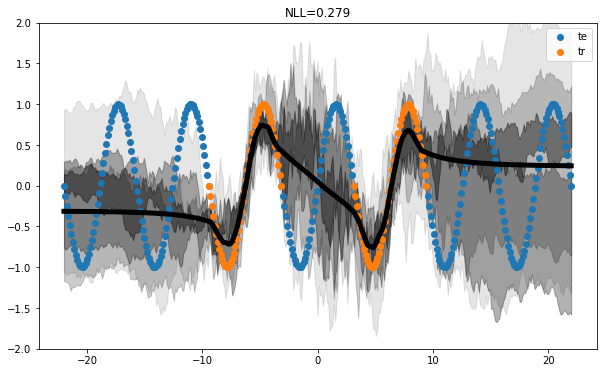

In [11]:
plot()